## Single Qubit rotation and Visualization

In this exercise, you are required to

1. Create a 1-qubit `QuantumCircuit`

2. Use `ry` gate and rotate the $|0\rangle$ state to the $|+\rangle$ state. $|+\rangle$ is +1 eigenstate of PauliX

3. Visualize the state with Bloch Sphere. (Now the state should have $(<\hat X>,<\hat Y>,<\hat Z>) = (1,0,0)$)

4. Use `rz` gate and rotate the $|+\rangle$ state to the $|+y\rangle$ state. $|+y\rangle$ is +1 eigenstate of PauliY

5. Visualize the state with Bloch Sphere. (Now the state should have $(<\hat X>,<\hat Y>,<\hat Z>) = (0,1,0)$)

6. Define a function rotate the $|0\rangle$ to $|\psi\rangle =sin(\frac{\theta}{2})|0\rangle +e^{i\phi}cos(\frac{\theta}{2})|1\rangle$

7. Compute $(<\hat X>,<\hat Y>,<\hat Z>)$ when $\theta=\frac{\pi}{4},\phi= -\frac{\pi}{3}$

In [140]:
## Solution

In [59]:
import qiskit
import numpy as np
from qiskit import Aer
from qiskit.visualization import plot_bloch_multivector
from qiskit.visualization import plot_state_paulivec

In [60]:
circ = qiskit.QuantumCircuit(1)

In [61]:
circ.ry(np.pi/2,0)

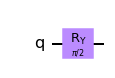

In [62]:
circ.draw("mpl")

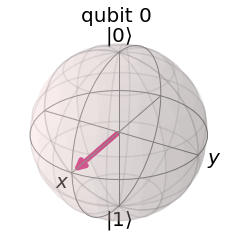

In [63]:
backend = Aer.get_backend('statevector_simulator')
job = backend.run(circ)
result = job.result()
psi1  = result.get_statevector()
plot_bloch_multivector(psi1)

In [64]:
circ.rz(np.pi/2,0)

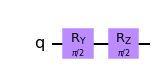

In [65]:
circ.draw('mpl')

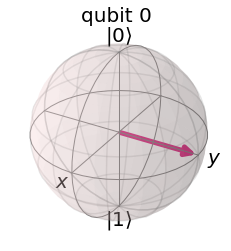

In [67]:
backend = Aer.get_backend('statevector_simulator')
job = backend.run(circ)
result = job.result()
psi2  = result.get_statevector()
plot_bloch_multivector(psi2)

## A non-trivial rotation combination

In [165]:
def rotation(theta,phi):
    '''
    rotate the state to sin(theta/2)|0>+exp(i\phi)cos(theta/2)|1>    
    '''
    q=qiskit.QuantumCircuit(1)
    q.ry(theta,0)
    q.rz(phi,0)
    backend = Aer.get_backend('statevector_simulator')
    job = backend.run(q)
    result = job.result()
    psi = result.get_statevector()
    return psi

## Some more physics

The $<\hat X>$ stands for the expecation value of $\hat X$ operator under certain quantum state.

Given a quantum state $|\psi\rangle$ and operator $\hat X$, it can be evaluate as 

$<\hat X > = \langle\psi|\hat X|\psi \rangle $

In linearAlgebra $\hat X$ is a matrix while $|\psi\rangle$ is a column vector,

$\langle\psi|$ is the conjugate transpose of $|\psi\rangle$,which is a row vector

In [130]:
## define a function to calculate expecation
def expect(psi, x):
    '''
    psi is the quantum state, which should e a colunm vector
    x is the operator
    '''
    assert len(psi.shape) ==2 ##make sure feed in a colum vector
    result = np.real(psi.conjugate().T @ x @ psi)
    ##reuslt is a ndarray, we can extract the value from the array
    return result[0][0]

In [131]:
float

float

In [132]:
psi1

array([0.70710678+0.j, 0.70710678+0.j])

As we can see above, the quanmtum state from qiskit is a row vector, we need to first reshape it to a column vector

In [133]:
new_psi1 = psi1.reshape(len(psi),1)

The three famous operator pauliX, pauliY, paluliZ and their matrix forms

$$\hat X =  \left(\begin{matrix}0&1\\1&0\end{matrix}\right) $$
$$
\hat Y =  \left(\begin{matrix}0&-i\\i&0\end{matrix}\right)
$$
$$
\hat Z =  \left(\begin{matrix}1&0\\0&-1\end{matrix}\right)
$$


In [134]:
X = np.array([[0,1],[1,0]])
Y = np.array([[0,-1j],[1j,0]])
Z = np.array([[1,0],[0,-1]])
pauli_list = [X,Y,Z]

### Now we can check this for the $|+\rangle$ and $|+y\rangle$ state

In [135]:
new_psi1 = psi1.reshape(len(psi1),1)
psi1_expect =[expect(new_psi1,i) for i in pauli_list]

In [136]:
psi1_expect

[1.0, 0.0, 2.220446049250313e-16]

It means that for $|\psi_1\rangle$ (corresponding to $|+\rangle$)  

we have  $(<\hat X>,<\hat Y>,<\hat Z>) = (1,0,0)$

In [138]:
new_psi2 = psi2.reshape(len(psi2),1)
psi2_expect =[expect(new_psi2,i) for i in pauli_list]

In [128]:
psi2_expect

[2.220446049250313e-16, 1.0, 2.220446049250313e-16]

It means that for $|\psi_2\rangle$ (corresponding to $|+y\rangle$)  

we have  $(<\hat X>,<\hat Y>,<\hat Z>) = (0,1,0)$

In [171]:
psi = rotation(np.pi/4,-np.pi/3)

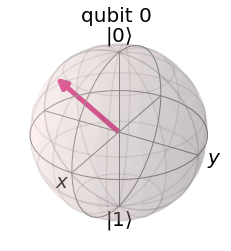

In [172]:
plot_bloch_multivector(psi)

In [173]:
new_psi = psi.reshape(len(psi),1)

In [174]:
psi_expect =[expect(new_psi,i) for i in pauli_list]

In [175]:
psi_expect

[0.35355339059327384, -0.6123724356957945, 0.7071067811865475]